In [1]:
# import library 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')


In [2]:
enrol_data = pd.read_csv('cleaned_enrolled_data.csv')
enrol_data.shape

(983051, 6)

In [3]:
enrol_data.columns

Index(['date', 'state', 'new_born', 'minor', 'adult', 'total'], dtype='object')

In [4]:
enrol_data.head()

,date,state,new_born,minor,adult,total
0,02-03-2025,Meghalaya,11,61,37,109
1,09-03-2025,Karnataka,14,33,39,86
2,09-03-2025,Uttar Pradesh,29,82,12,123
3,09-03-2025,Uttar Pradesh,62,29,15,106
4,09-03-2025,Karnataka,14,16,21,51


In [5]:
enrol_data[['minor','adult', 'total']].describe()

,minor,adult,total
count,983051.000000,983051.000000,983051.000000
mean,1.720061,0.169115,5.423468
std,14.529913,3.251934,31.932495
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,2.000000
75%,1.000000,0.000000,5.000000
max,1812.000000,855.000000,3965.000000


In [6]:
enrol_data[enrol_data['total']==3965.000000]

,date,state,new_born,minor,adult,total
2976,01-07-2025,Uttar Pradesh,2688,1254,23,3965


In [7]:
enrol_data[enrol_data['adult']==8.550000e+02]

,date,state,new_born,minor,adult,total
2632,01-07-2025,Meghalaya,287,1396,855,2538


In [8]:
enrol_data[enrol_data['minor']==1.812000e+03]

,date,state,new_born,minor,adult,total
893,01-04-2025,Meghalaya,573,1812,642,3027


In [9]:
enrol_data[enrol_data['new_born']==2.688000e+03]

,date,state,new_born,minor,adult,total
2976,01-07-2025,Uttar Pradesh,2688,1254,23,3965


In [10]:
enrol_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 983051 entries, 0 to 983050
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   date      983051 non-null  object
 1   state     983051 non-null  object
 2   new_born  983051 non-null  int64 
 3   minor     983051 non-null  int64 
 4   adult     983051 non-null  int64 
 5   total     983051 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 45.0+ MB


In [11]:
#max no of enrollments on which date  
enrol_data['total'].max()

3965

In [12]:
enrol_data[enrol_data['total'] == 3965]

,date,state,new_born,minor,adult,total
2976,01-07-2025,Uttar Pradesh,2688,1254,23,3965


In [13]:
# min number of enrollments 
enrol_data['total'].nsmallest(1)

3332    1
Name: total, dtype: int64

In [14]:
enrol_data.iloc[3332]

date            01-09-2025
state       Andhra Pradesh
new_born                 1
minor                    0
adult                    0
total                    1
Name: 3332, dtype: object

In [15]:
enrol_data['date'] = pd.to_datetime(enrol_data['date'], errors = 'coerce', dayfirst=True)
enrol_data['date'].dtype

dtype('<M8[ns]')

In [16]:
enrol_data.head(3) #YYYY-MM-DD

,date,state,new_born,minor,adult,total
0,2025-03-02,Meghalaya,11,61,37,109
1,2025-03-09,Karnataka,14,33,39,86
2,2025-03-09,Uttar Pradesh,29,82,12,123


In [17]:
enrol_data['date'].isnull().sum()

0

Dates were originally stored in DD-MM-YYYY format and were explicitly parsed using dayfirst=True to avoid incorrect coercion to missing values.

UIDAI district definitions are operational and may differ from census districts due to historical and administrative variations. Since our analysis focuses on state-level trends, district-level discrepancies do not affect the findings.

# data standardization converting enrollment numbers into ratios 

goal of date vs enrollment analysis: Show how Aadhaar enrollment behavior evolves over time and how Meghalaya structurally differs from the national pattern.

In [18]:
newborn_enrol = enrol_data['new_born'].sum()
total_minor_enrol = enrol_data['minor'].sum()
total_adult_enrol = enrol_data['adult'].sum()
total_enrol = enrol_data['total'].sum()

In [19]:
newborn_enrol

3474389

In [20]:
total_minor_enrol

1690908

In [21]:
total_adult_enrol

166249

In [22]:
total_enrol

5331546

In [23]:
# ratio or percentage 
enrol_data['new_born'] = round((enrol_data['new_born']/ enrol_data['total'])*100,1)
enrol_data['minor'] = round((enrol_data['minor']/ enrol_data['total'])*100,1)
enrol_data['adult'] = round((enrol_data['adult']/ enrol_data['total'])*100,1)
enrol_data.head(2)

,date,state,new_born,minor,adult,total
0,2025-03-02,Meghalaya,10.1,56.0,33.9,109
1,2025-03-09,Karnataka,16.3,38.4,45.3,86


dataset is now at ratio level and not raw counts => which is good for comparative analysis

In [24]:
enrol_data['year_month'] = enrol_data['date'].dt.to_period('M')
enrol_data.head(1)

,date,state,new_born,minor,adult,total,year_month
0,2025-03-02,Meghalaya,10.1,56.0,33.9,109,2025-03


In [25]:
enrol_data[enrol_data['year_month'] == '2025-08']

,date,state,new_born,minor,adult,total,year_month


In [26]:
 enrol_data[enrol_data['state'] == 'Andaman and Nicobar Islands']

,date,state,new_born,minor,adult,total,year_month
4928,2025-09-01,Andaman and Nicobar Islands,100.0,0.0,0.0,1,2025-09
4929,2025-09-01,Andaman and Nicobar Islands,100.0,0.0,0.0,1,2025-09
8134,2025-09-01,Andaman and Nicobar Islands,0.0,100.0,0.0,1,2025-09
8135,2025-09-01,Andaman and Nicobar Islands,100.0,0.0,0.0,1,2025-09
8136,2025-09-01,Andaman and Nicobar Islands,81.8,18.2,0.0,11,2025-09
...,...,...,...,...,...,...,...
969996,2025-12-31,Andaman and Nicobar Islands,100.0,0.0,0.0,1,2025-12
974428,2025-12-31,Andaman and Nicobar Islands,100.0,0.0,0.0,1,2025-12
974429,2025-12-31,Andaman and Nicobar Islands,100.0,0.0,0.0,1,2025-12
976776,2025-12-31,Andaman and Nicobar Islands,100.0,0.0,0.0,1,2025-12


monthly, state-level, percentage-based data.<br>
This data does not have any enrollment in the (august)8th month 

# AGGREGATE DATA 
As enrollment ratios are proportions so i used the mean to summarize monthly behavior, since summing percentages leads to misleading interpretations

In [27]:
# monthly state enrollment data 
monthly_state_data = enrol_data.groupby(['state','year_month'],as_index=False).agg({'new_born': 'mean','minor': 'mean','adult': 'mean','total': 'sum'})
monthly_state_data['new_born'] = round(monthly_state_data['new_born'], 1)
monthly_state_data['minor'] = round(monthly_state_data['minor'], 1)
monthly_state_data['adult'] = round(monthly_state_data['adult'], 1)
monthly_state_data

,state,year_month,new_born,minor,adult,total
0,Andaman and Nicobar Islands,2025-09,92.5,7.5,0.0,188
1,Andaman and Nicobar Islands,2025-10,91.8,8.2,0.0,81
2,Andaman and Nicobar Islands,2025-11,96.6,3.4,0.0,108
3,Andaman and Nicobar Islands,2025-12,97.0,3.0,0.0,124
4,Andhra Pradesh,2025-03,36.2,37.9,25.9,116
...,...,...,...,...,...,...
261,West Bengal,2025-07,48.1,41.0,10.9,28544
262,West Bengal,2025-09,73.2,25.4,1.4,119657
263,West Bengal,2025-10,74.8,24.8,0.4,73250
264,West Bengal,2025-11,73.9,25.6,0.4,78940


In [28]:
monthly_state_data['total'].nlargest(1)

244    261079
Name: total, dtype: int64

In [29]:
monthly_state_data.iloc[244]

state         Uttar Pradesh
year_month          2025-09
new_born               48.4
minor                  50.6
adult                   0.9
total                261079
Name: 244, dtype: object

In [30]:
monthly_state_data.shape

(266, 6)

In [31]:
enrol_data.head(1)

,date,state,new_born,minor,adult,total,year_month
0,2025-03-02,Meghalaya,10.1,56.0,33.9,109,2025-03


In [32]:
# cal national avg(minor and adult enrollment ratio) per month which can be used as a reference to compare the states 
national_avg_per_month  = enrol_data.groupby('year_month',as_index=False).agg({'new_born':'mean','minor':'mean', 'adult':'mean', 'total': 'sum'})
national_avg_per_month['new_born'] = round(national_avg_per_month['new_born'],1)
national_avg_per_month['minor'] = round(national_avg_per_month['minor'],1)
national_avg_per_month['adult'] = round(national_avg_per_month['adult'],1)

national_avg_per_month

,year_month,new_born,minor,adult,total
0,2025-03,33.2,41.8,25.0,16582
1,2025-04,54.1,32.9,13.0,257438
2,2025-05,50.2,36.1,13.7,183616
3,2025-06,45.7,43.1,11.2,215734
4,2025-07,51.4,39.6,9.0,616868
5,2025-09,72.3,26.7,1.0,1475867
6,2025-10,73.2,25.0,1.8,779616
7,2025-11,74.1,23.8,2.1,1052573
8,2025-12,79.4,19.0,1.6,733252


In [33]:
monthly_state_data['year_month'].dtype

period[M]

In [34]:
national_avg_per_month['year_month'].dtype

period[M]

In [35]:
monthly_state_data['year_month'] =monthly_state_data['year_month'].dt.to_timestamp()

In [36]:
national_avg_per_month['year_month'] =national_avg_per_month['year_month'].dt.to_timestamp()

In [37]:
print(monthly_state_data['year_month'].dtype)

datetime64[ns]


Text(0.5, 0, 'Months')

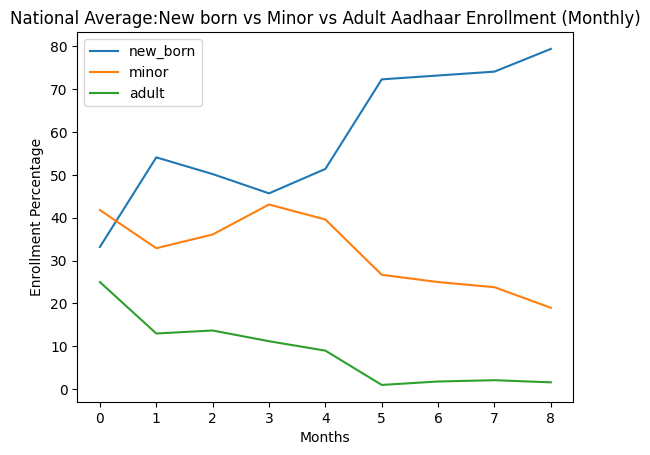

In [38]:
# visualise the trend 
national_avg_per_month[['new_born','minor', 'adult']].plot(kind = 'line', title='National Average:New born vs Minor vs Adult Aadhaar Enrollment (Monthly)')
plt.ylabel('Enrollment Percentage')
plt.xlabel('Months')

At the national level, Aadhaar enrollment is overwhelmingly driven by new borns and minors, while adult enrollment remains consistently low, indicating saturation among adults.

In [39]:
# Which states behave differently, and how?

in state vs enrollment analyis : meghalaya is an outlier lets check its behaviour with respect to time 

In [40]:
meghalaya_data = monthly_state_data[monthly_state_data['state']=='Meghalaya']
nagaland_data = monthly_state_data[monthly_state_data['state']=='Nagaland']

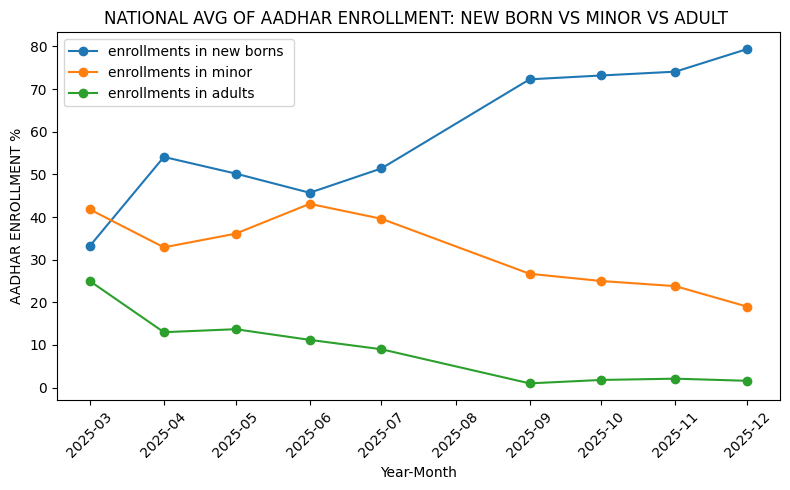

In [41]:
# plot minor vs adult 
plt.figure(figsize=(8,5))
plt.plot(national_avg_per_month['year_month'], national_avg_per_month['new_born'], marker = 'o', label = 'enrollments in new borns ')
plt.plot(national_avg_per_month['year_month'], national_avg_per_month['minor'], marker = 'o', label = 'enrollments in minor ')
plt.plot(national_avg_per_month['year_month'], national_avg_per_month['adult'], marker = 'o',label = 'enrollments in adults')
plt.xlabel('Year-Month')
plt.ylabel('AADHAR ENROLLMENT %')
plt.title('NATIONAL AVG OF AADHAR ENROLLMENT: NEW BORN VS MINOR VS ADULT ')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In every month, Meghalaya’s adult enrollment percentage is much higher than the national average.<br>
The national line stays low and mostly flat, especially after mid-year, indicating adult Aadhaar enrollment saturation at the national level.<br>
Meghalaya shows sustained adult enrollment activity throughout the year, peaking above 40% in early 2025 and remaining above national levels in all months.<br>
✔ Suggests delayed adoption or demographic factors.<br>
The gap between Meghalaya and the national average remains large across all months, proving this is not a one-time spike.

*“While adult Aadhaar enrollment is largely saturated at the national level, Meghalaya consistently demonstrates significantly higher adult enrollment across all months of 2025, indicating unique state-specific enrollment dynamics.”*

In [42]:
# How much adult enrollments is higher in Meghalaya compared to India?
meghalaya_vs_india = meghalaya_data.merge(national_avg_per_month[['year_month', 'adult']], on = 'year_month', suffixes = ('_meghalaya', '_national'))
meghalaya_vs_india


,state,year_month,new_born,minor,adult_meghalaya,total,adult_national
0,Meghalaya,2025-03-01,33.3,21.2,45.4,1550,25.0
1,Meghalaya,2025-04-01,23.0,56.2,20.8,30512,13.0
2,Meghalaya,2025-05-01,21.9,43.1,35.0,17380,13.7
3,Meghalaya,2025-06-01,13.6,52.2,34.2,13561,11.2
4,Meghalaya,2025-07-01,15.2,49.2,35.6,23909,9.0
5,Meghalaya,2025-09-01,22.9,48.0,29.1,9539,1.0
6,Meghalaya,2025-10-01,23.8,51.6,24.5,4758,1.8
7,Meghalaya,2025-11-01,24.6,46.2,29.3,5897,2.1
8,Meghalaya,2025-12-01,29.1,53.7,17.2,2133,1.6


In [43]:
#adult_enrol_gap = Meghalaya adult % − National adult %
meghalaya_vs_india['adult_enrol_gap'] = (meghalaya_vs_india['adult_meghalaya'] - meghalaya_vs_india['adult_national'])
meghalaya_vs_india[['year_month', 'adult_enrol_gap']]

,year_month,adult_enrol_gap
0,2025-03-01,20.4
1,2025-04-01,7.8
2,2025-05-01,21.3
3,2025-06-01,23.0
4,2025-07-01,26.6
5,2025-09-01,28.1
6,2025-10-01,22.7
7,2025-11-01,27.2
8,2025-12-01,15.6


In [44]:
meghalaya_vs_india['cumulative_gap'] = meghalaya_vs_india['adult_enrol_gap'].cumsum()
meghalaya_vs_india

,state,year_month,new_born,minor,adult_meghalaya,total,adult_national,adult_enrol_gap,cumulative_gap
0,Meghalaya,2025-03-01,33.3,21.2,45.4,1550,25.0,20.4,20.4
1,Meghalaya,2025-04-01,23.0,56.2,20.8,30512,13.0,7.8,28.2
2,Meghalaya,2025-05-01,21.9,43.1,35.0,17380,13.7,21.3,49.5
3,Meghalaya,2025-06-01,13.6,52.2,34.2,13561,11.2,23.0,72.5
4,Meghalaya,2025-07-01,15.2,49.2,35.6,23909,9.0,26.6,99.1
5,Meghalaya,2025-09-01,22.9,48.0,29.1,9539,1.0,28.1,127.2
6,Meghalaya,2025-10-01,23.8,51.6,24.5,4758,1.8,22.7,149.9
7,Meghalaya,2025-11-01,24.6,46.2,29.3,5897,2.1,27.2,177.1
8,Meghalaya,2025-12-01,29.1,53.7,17.2,2133,1.6,15.6,192.7


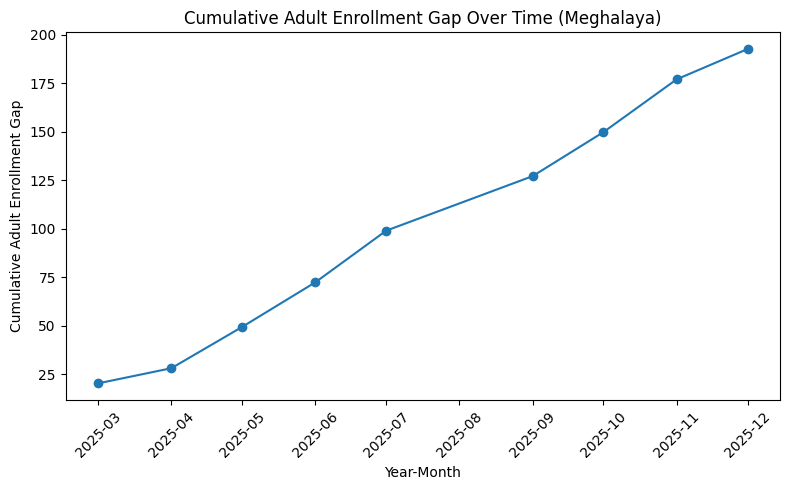

In [45]:

plt.figure(figsize=(8,5))
plt.plot(
    meghalaya_vs_india['year_month'],
    meghalaya_vs_india['cumulative_gap'],
    marker='o'
)

plt.xlabel('Year-Month')
plt.ylabel('Cumulative Adult Enrollment Gap')
plt.title('Cumulative Adult Enrollment Gap Over Time (Meghalaya)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph shows a consistently rising line, which indicates:<br>
 - The adult enrollment gap is continuously increasing over time<br>
 - The gap is not being closed, but instead accumulating<br>

The cumulative adult enrollment gap in Meghalaya shows a continuous upward trend from March to December 2025. This indicates that although adult enrollment is relatively strong, persistent monthly shortfalls are accumulating over time, highlighting the need for targeted adult enrollment interventions.